In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


**Preprocess**

In [2]:
df = pd.read_csv("/kaggle/input/iris/Iris.csv")
df.rename(columns={"SepalLengthCm": "sepal_length", "SepalWidthCm": "sepal_width"},inplace=True ,errors="raise")

df.head()

,Id,sepal_length,sepal_width,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
sepal_length     150 non-null float64
sepal_width      150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Labeling categorical data

In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df["Species"])
integer_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
df["class"]= integer_encoded
df.head()

,Id,sepal_length,sepal_width,PetalLengthCm,PetalWidthCm,Species,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


**Graph**

Text(0, 0.5, 'sepal_width')

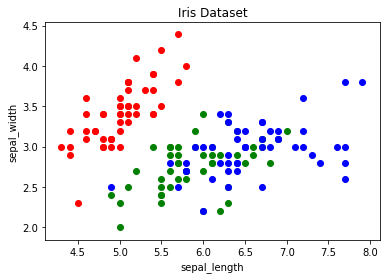

In [6]:
import matplotlib.pyplot as plt

colors = {0:'r', 1:'g', 2:'b'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(df['sepal_length'])):
    ax.scatter(df['sepal_length'][i], df['sepal_width'][i],color=colors[df["class"][i]])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')



In [7]:
from sklearn.model_selection import train_test_split

X = df[['sepal_length','sepal_width','PetalLengthCm','PetalWidthCm']]
y = df.iloc[:,6].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,random_state=24)

print(X)

     sepal_length  sepal_width  PetalLengthCm  PetalWidthCm
0             5.1          3.5            1.4           0.2
1             4.9          3.0            1.4           0.2
2             4.7          3.2            1.3           0.2
3             4.6          3.1            1.5           0.2
4             5.0          3.6            1.4           0.2
..            ...          ...            ...           ...
145           6.7          3.0            5.2           2.3
146           6.3          2.5            5.0           1.9
147           6.5          3.0            5.2           2.0
148           6.2          3.4            5.4           2.3
149           5.9          3.0            5.1           1.8

[150 rows x 4 columns]


**Checks which K value is the best**

For k = 1 Accuracy:95.00 CrossValScore:95.56 
For k = 2 Accuracy:95.00 CrossValScore:94.44 
For k = 3 Accuracy:98.33 CrossValScore:95.56 
For k = 4 Accuracy:98.33 CrossValScore:95.56 
For k = 5 Accuracy:96.67 CrossValScore:95.56 
For k = 6 Accuracy:98.33 CrossValScore:95.56 
For k = 7 Accuracy:96.67 CrossValScore:95.56 
For k = 8 Accuracy:100.00 CrossValScore:95.56 
For k = 9 Accuracy:98.33 CrossValScore:96.67 
For k = 10 Accuracy:100.00 CrossValScore:95.56 
For k = 11 Accuracy:98.33 CrossValScore:96.67 
For k = 12 Accuracy:98.33 CrossValScore:96.67 
For k = 13 Accuracy:98.33 CrossValScore:96.67 
For k = 14 Accuracy:98.33 CrossValScore:96.67 


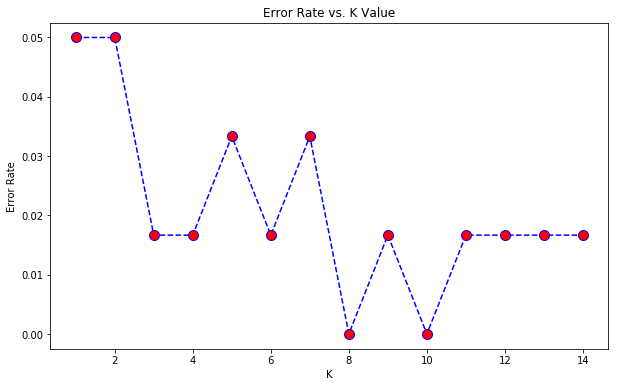

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

error_rate = []
accuracylist = []
crossV = []

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy= metrics.accuracy_score(y_pred, y_test)*100
    error_rate.append(np.mean(y_pred != y_test))
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    scores = cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')*100
    accuracylist.append(accuracy)
    crossV.append(scores.mean())
    
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')    

for i, (value1,value2) in enumerate(zip(accuracylist, crossV),1):
    print("For k =",i,"Accuracy:{0:.2f} CrossValScore:{1:.2f} ".format(value1,value2))
    
    



K = 8

**Predicts**

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


clfs = {
    'KNN': KNeighborsClassifier(n_neighbors = 8),
    'Naive_bayes': GaussianNB(),
    'Logistic_Regression': LogisticRegression()
}

for clf_name in clfs.keys():
    print("Training",clf_name,"classifier")
    clf = clfs[clf_name]
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    print(classification_report(y_test, y_predict))
    print()

Training KNN classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        22

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Training Naive_bayes classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.89      0.94      0.91        17
           2       0.95      0.91      0.93        22

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60


Training Logistic_Regression classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.94      0.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
